#Finding correlation between the UK Transport Authorities Dataset and the LCWIPs dataset

In [ ]:
pip install pandas geopandas requests matplotlib folium --quiet

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as plt

In [3]:
import requests
import folium
import json

##loading the LCWIP Json file first

In [4]:
with open('LCWIP_database.json') as f: #reading the lcwip database
  lcwip_data = json.load(f)
  lcwip_df = pd.DataFrame(lcwip_data)

In [5]:
df_org = lcwip_df #saving the untouched dataset
print(lcwip_df.columns.tolist()) #checking the columns

['pdf_url', 'date_published', 'mentions_pct', 'report_name', 'other_tools_used', 'how_pct_was_used', 'other_tools_developed', 'specific_evidence_of_impact_of_using_pct', 'quotes_on_using_pct', 'local_authority_name', 'combined_authority_name', 'length_of_cycle_network_proposed', 'total_cost_of_network', 'specific_evidence_of_impact']


In [6]:
lcwip_pct = df_org #df just for the mentions of PCT

In [7]:
print(lcwip_pct['mentions_pct'].value_counts()) #checking the counts of reports that mention PCT
print(lcwip_pct['mentions_pct'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%') #into percentage

mentions_pct
True     90
False     4
Name: count, dtype: int64
mentions_pct
True     95.7%
False     4.3%
Name: proportion, dtype: object


In [8]:
lcwip_pct.columns

Index(['pdf_url', 'date_published', 'mentions_pct', 'report_name',
       'other_tools_used', 'how_pct_was_used', 'other_tools_developed',
       'specific_evidence_of_impact_of_using_pct', 'quotes_on_using_pct',
       'local_authority_name', 'combined_authority_name',
       'length_of_cycle_network_proposed', 'total_cost_of_network',
       'specific_evidence_of_impact'],
      dtype='object')

In [9]:
lcwip_pct['local_authority_name'].value_counts()

local_authority_name
Oxfordshire County Council                                                         9
Cumbria County Council [3]                                                         5
Cumbria County Council                                                             3
Durham County Council                                                              2
Leicestershire County Council                                                      2
                                                                                  ..
Lancashire County Council & Blackpool Council (and Fylde Council, Wyre Council)    1
Adur & Worthing Councils                                                           1
Crawley Borough Council                                                            1
Horsham District Council                                                           1
Kent County Council                                                                1
Name: count, Length: 74, dtype: int64

In [10]:
lcwip_pct['report_name'].value_counts()

report_name
Ripon and Catterick Phase 1 LCWIPs                                                           2
Thirsk and Whitby Local Cycling and Walking Infrastructure Plans                             2
Cheshire West and Chester Council Local Cycling and Walking Infrastructure Plan 2020-2030    1
Liverpool City Region Local Cycling and Walking Infrastructure Plan                          1
Kendal Local Cycling and Walking Infrastructure Plan (LCWIP) 2022-2037                       1
                                                                                            ..
Portsmouth Local Cycling & Walking Infrastructure Plan Background Report                     1
Adur & Worthing Local Cycling and Walking Infrastructure Plan (LCWIP) Background Report      1
Crawley Local Cycling and Walking Infrastructure Plan (LCWIP) Report and Appendices          1
Horsham District Local Cycling and Walking Infrastructure Plan                               1
Kent Cycling and Walking Infrastructur

In [11]:
lcwip_pct['local_authority_name'].tolist()

['Liverpool City Region Combined Authority (LCRCA), in partnership with Halton, Knowsley, Liverpool, Sefton, St Helens, and Wirral councils.[1]',
 'North Yorkshire Council (for Ripon)',
 'North Yorkshire Council (for Catterick)',
 'Cheshire West and Chester Council [3]',
 'Rutland County Council',
 'Cumbria County Council, South Lakeland District Council, and Kendal Town Council [3]',
 'Warwickshire County Council [3]',
 'Dover District Council and Kent County Council [3]',
 'Cumbria County Council [3]',
 'Cumbria County Council [3]',
 'Cumbria County Council [3]',
 'Durham County Council [3]',
 'West of England Combined Authority (WECA), Bath & North East Somerset, Bristol City, South Gloucestershire, North Somerset Council [3]',
 'Royal Borough of Windsor & Maidenhead [3]',
 'Durham County Council [3]',
 'Cumbria County Council',
 'Cumbria County Council [3]',
 'Cumbria County Council [3]',
 'Staffordshire County Council [3]',
 'Derby City Council, Derbyshire County Council, Nottingh

##Loading the UK Transport Authorities boundary

In [12]:
atf_df = gpd.read_file('https://raw.githubusercontent.com/itsleeds/uktransportauthorities/main/atf_joined_2025.geojson') #loading the geojson atf

In [13]:
atf_df.head()

,name,atf24_25,atf23_24,atf22_23,atf21_22,atf20_21,atfe20_21,geometry
0,Bedford,110977.0,0.0,263130.0,0.0,363750.0,30250.0,"MULTIPOLYGON (((-0.47626 52.31806, -0.48714 52..."
1,Blackburn with Darwen,185106.0,0.0,157270.0,0.0,292600.0,77000.0,"MULTIPOLYGON (((-2.46581 53.78081, -2.47709 53..."
2,Blackpool,84208.0,0.0,0.0,0.0,312000.0,26000.0,"MULTIPOLYGON (((-3.01524 53.84277, -3.01794 53..."
3,"Bournemouth, Christchurch and Poole",478063.0,0.0,3780000.0,208947.0,1062100.0,312835.0,"MULTIPOLYGON (((-1.85662 50.80489, -1.8646 50...."
4,Bracknell Forest,74781.0,75000.0,30000.0,0.0,181800.0,57000.0,"MULTIPOLYGON (((-0.76964 51.46776, -0.78256 51..."


In [14]:
atf_df.count() #checking the counts to be consistent with the csv

name         73
atf24_25     71
atf23_24     71
atf22_23     71
atf21_22     71
atf20_21     71
atfe20_21    71
geometry     73
dtype: int64

In [15]:
atf_csv = pd.read_csv('https://raw.githubusercontent.com/itsleeds/uktransportauthorities/main/atf_table_aggregated.csv') #loading the csv file

In [16]:
atf_csv.head()

,name,atf24_25,atf23_24,atf22_23,atf21_22,atf20_21,atfe20_21,name_atf
0,Bedford,110977,0,263130,0,363750,30250,Bedford Unitary Authority
1,Blackburn with Darwen,185106,0,157270,0,292600,77000,Blackburn with Darwen Unitary Authority
2,Blackpool,84208,0,0,0,312000,26000,Blackpool Unitary Authority
3,"Bournemouth, Christchurch and Poole",478063,0,3780000,208947,1062100,312835,"Bournemouth, Christchurch & Poole Unitary Auth..."
4,Bracknell Forest,74781,75000,30000,0,181800,57000,Bracknell Forest Unitary Authority


In [17]:
name1 = atf_csv['name']
name2 = atf_df['name']
if name1 is name2:
    print("The datasets are in same order.") #making sure if there are same set of names or count of entries in both datasets.

In [18]:
atf_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       75 non-null     object
 1   atf24_25   75 non-null     int64 
 2   atf23_24   75 non-null     int64 
 3   atf22_23   75 non-null     int64 
 4   atf21_22   75 non-null     int64 
 5   atf20_21   75 non-null     int64 
 6   atfe20_21  75 non-null     int64 
 7   name_atf   75 non-null     object
dtypes: int64(6), object(2)
memory usage: 4.8+ KB


In [19]:
atf_df.columns.tolist()

['name',
 'atf24_25',
 'atf23_24',
 'atf22_23',
 'atf21_22',
 'atf20_21',
 'atfe20_21',
 'geometry']

In [20]:
cols_df = ['atf24_25', 'atf23_24', 'atf22_23', 'atf21_22', 'atf20_21', 'atfe20_21']
for col in cols_df:
    num_col1 = pd.to_numeric(atf_df[col], downcast='integer', errors='coerce')
    atf_df[col] = num_col1.astype('Int64')

    num_col2 = pd.to_numeric(atf_csv[col], downcast='integer', errors='coerce')
    atf_csv[col] = num_col2.astype('Int64')

In [21]:
atf_df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       73 non-null     object  
 1   atf24_25   71 non-null     Int64   
 2   atf23_24   71 non-null     Int64   
 3   atf22_23   71 non-null     Int64   
 4   atf21_22   71 non-null     Int64   
 5   atf20_21   71 non-null     Int64   
 6   atfe20_21  71 non-null     Int64   
 7   geometry   73 non-null     geometry
dtypes: Int64(6), geometry(1), object(1)
memory usage: 5.1+ KB


In [22]:
atf_csv.head()

,name,atf24_25,atf23_24,atf22_23,atf21_22,atf20_21,atfe20_21,name_atf
0,Bedford,110977,0,263130,0,363750,30250,Bedford Unitary Authority
1,Blackburn with Darwen,185106,0,157270,0,292600,77000,Blackburn with Darwen Unitary Authority
2,Blackpool,84208,0,0,0,312000,26000,Blackpool Unitary Authority
3,"Bournemouth, Christchurch and Poole",478063,0,3780000,208947,1062100,312835,"Bournemouth, Christchurch & Poole Unitary Auth..."
4,Bracknell Forest,74781,75000,30000,0,181800,57000,Bracknell Forest Unitary Authority


In [23]:
atf_df.head()

,name,atf24_25,atf23_24,atf22_23,atf21_22,atf20_21,atfe20_21,geometry
0,Bedford,110977,0,263130,0,363750,30250,"MULTIPOLYGON (((-0.47626 52.31806, -0.48714 52..."
1,Blackburn with Darwen,185106,0,157270,0,292600,77000,"MULTIPOLYGON (((-2.46581 53.78081, -2.47709 53..."
2,Blackpool,84208,0,0,0,312000,26000,"MULTIPOLYGON (((-3.01524 53.84277, -3.01794 53..."
3,"Bournemouth, Christchurch and Poole",478063,0,3780000,208947,1062100,312835,"MULTIPOLYGON (((-1.85662 50.80489, -1.8646 50...."
4,Bracknell Forest,74781,75000,30000,0,181800,57000,"MULTIPOLYGON (((-0.76964 51.46776, -0.78256 51..."


In [24]:
atf_subset = atf_csv[["name","name_atf"]] #creating a subset from csv to merge into the geodataframe

In [25]:
atf_df_new = atf_df.merge(atf_subset,how='left',on='name') #merging on the name column using left instead of inner key

In [26]:
atf_df_new.head()

,name,atf24_25,atf23_24,atf22_23,atf21_22,atf20_21,atfe20_21,geometry,name_atf
0,Bedford,110977,0,263130,0,363750,30250,"MULTIPOLYGON (((-0.47626 52.31806, -0.48714 52...",Bedford Unitary Authority
1,Blackburn with Darwen,185106,0,157270,0,292600,77000,"MULTIPOLYGON (((-2.46581 53.78081, -2.47709 53...",Blackburn with Darwen Unitary Authority
2,Blackpool,84208,0,0,0,312000,26000,"MULTIPOLYGON (((-3.01524 53.84277, -3.01794 53...",Blackpool Unitary Authority
3,"Bournemouth, Christchurch and Poole",478063,0,3780000,208947,1062100,312835,"MULTIPOLYGON (((-1.85662 50.80489, -1.8646 50....","Bournemouth, Christchurch & Poole Unitary Auth..."
4,Bracknell Forest,74781,75000,30000,0,181800,57000,"MULTIPOLYGON (((-0.76964 51.46776, -0.78256 51...",Bracknell Forest Unitary Authority


In [27]:
atf_df_new.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   name       73 non-null     object  
 1   atf24_25   71 non-null     Int64   
 2   atf23_24   71 non-null     Int64   
 3   atf22_23   71 non-null     Int64   
 4   atf21_22   71 non-null     Int64   
 5   atf20_21   71 non-null     Int64   
 6   atfe20_21  71 non-null     Int64   
 7   geometry   73 non-null     geometry
 8   name_atf   71 non-null     object  
dtypes: Int64(6), geometry(1), object(2)
memory usage: 5.7+ KB


<Axes: >

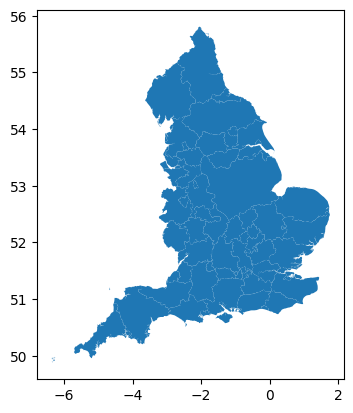

In [28]:
atf_df_new.plot()

<Axes: >

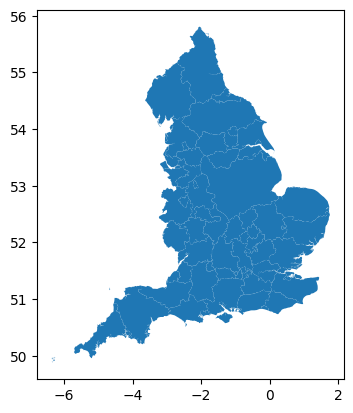

In [29]:
atf_df.plot()

##Matching the LAs between the two final dfs

In [30]:
atf_df_new.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [31]:
atf_df_new[atf_df_new['name_atf'].duplicated()]

,name,atf24_25,atf23_24,atf22_23,atf21_22,atf20_21,atfe20_21,geometry,name_atf
37,North Lincolnshire,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"MULTIPOLYGON (((-0.5586 53.68949, -0.54357 53....",NaN


In [32]:
atf_names_list = atf_df_new['name'].dropna().tolist()

In [33]:
atf_names_list

['Bedford',
 'Blackburn with Darwen',
 'Blackpool',
 'Bournemouth, Christchurch and Poole',
 'Bracknell Forest',
 'Brighton and Hove',
 'Buckinghamshire',
 'Cambridgeshire and Peterborough Combined Authority',
 'Central Bedfordshire',
 'Cheshire East',
 'Cheshire West and Chester',
 'Cornwall',
 'Cumbria',
 'Devon',
 'Dorset',
 'East Midlands Combined Authority',
 'East Riding of Yorkshire',
 'East Sussex',
 'Essex',
 'Gloucestershire',
 'Greater London',
 'Greater Manchester Combined Authority',
 'Hampshire',
 'Herefordshire',
 'Hertfordshire',
 'Isle of Wight',
 'Isles of Scilly',
 'Kent',
 'Kingston upon Hull',
 'Lancashire',
 'Liverpool City Region Combined Authority',
 'Luton',
 'Medway',
 'Milton Keynes',
 'Norfolk',
 'North East Joint Transport Committee',
 'North East Lincolnshire',
 'North Lincolnshire',
 'North Northamptonshire',
 'North Somerset',
 'North Yorkshire',
 'Oxfordshire',
 'Plymouth',
 'Portsmouth',
 'Reading',
 'Shropshire',
 'Slough',
 'Somerset',
 'South Yorksh

In [34]:
ca_constituent_map = {
    'West Yorkshire Combined Authority': ['Leeds', 'Wakefield', 'Calderdale', 'Kirklees', 'Bradford'],
    'Liverpool City Region Combined Authority': ['Halton', 'Knowsley', 'Liverpool', 'Sefton', 'St Helens', 'Wirral'],
    'Greater Manchester Combined Authority': ['Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale', 'Salford', 'Stockport', 'Tameside', 'Trafford', 'Wigan'],
    'West of England Combined Authority': ['Bath & North East Somerset', 'Bristol', 'South Gloucestershire'],
    'North East Joint Transport Committee': ['Durham', 'Gateshead', 'South Tyneside', 'Sunderland', 'Northumberland', 'Newcastle upon Tyne', 'North Tyneside'],
    'South Yorkshire Combined Authority': ['Barnsley', 'Doncaster', 'Rotherham', 'Sheffield'],
    'Tees Valley Combined Authority': ['Darlington', 'Hartlepool', 'Middlesbrough', 'Redcar and Cleveland', 'Stockton-on-Tees'],
    'Cambridgeshire and Peterborough Combined Authority': ['Cambridge', 'Peterborough'],
    'West Midlands ITA': ['Birmingham', 'Coventry', 'Dudley', 'Sandwell', 'Solihull', 'Walsall', 'Wolverhampton'],
    'East Midlands Combined Authority': ['Derby', 'Derbyshire', 'Nottingham', 'Nottinghamshire','Leicester','Leicestershire','Lincolnshire','Nottingham','Nottinghamshire','Rutland'],
    'Royal Borough of Windsor and Maidenhead Unitary Authority':['The Royal Borough of Windsor & Maidenhead (RBWM)','Windsor and Maidenhead','Royal Borough of Windsor & Maidenhead'],
    'Brighton & Hove Unitary Authority':['Brighton and Hove','Brighton & Hove City Council'],
    'Isles of Scilly':['Council of the ISLES OF SCILLY'],
    'Hampshire':['Hart District Council','Hampshire County Council'],
    'Cumbria':["Cumbria County Council","South Lakeland District Council", "Kendal Town Council","Cumbria County Council, South Lakeland District Council, and Kendal Town Council [3]"]
}

In [35]:
def find_authority_match(lcwip_name, atf_list, ca_map):
    """
    Matches an LCWIP authority name to an ATF authority name.

    1. Checks for a direct match with a Combined Authority name.
    2. If no direct match, checks if any constituent council name is present.
    3. If still no match, checks for a direct match with other local authorities.
    """
    if not isinstance(lcwip_name, str):
        return None

    # Priority 1: Check for a direct match with a Combined Authority from the map keys
    for ca_name in ca_map.keys():
        if ca_name in lcwip_name:
            return ca_name

    # Priority 2: Check for constituent councils from the map values
    for ca_name, councils in ca_map.items():
        for council in councils:
            if council in lcwip_name:
                return ca_name # Return the parent Combined Authority name

    # Priority 3: Check for a direct match with any other name in the ATF list
    # Sort by length to match "North Yorkshire" before "York"
    for atf_name in sorted(atf_list, key=len, reverse=True):
        if atf_name in lcwip_name:
            return atf_name

    return None

In [36]:
#Apply the function to your DataFrame
lcwip_pct['matched_authority_name'] = lcwip_pct['local_authority_name'].apply(
    lambda x: find_authority_match(x, atf_names_list, ca_constituent_map)
)

#Display the results to verify
print("Matching complete. Here are the unique matches found:")
print(
    lcwip_pct[['local_authority_name', 'matched_authority_name']]
    .dropna()
    .drop_duplicates()
    .sort_values('matched_authority_name')
)

Matching complete. Here are the unique matches found:
                                 local_authority_name  \
71  BCP Council (Bournemouth, Christchurch and Poole)   
20                       Bracknell Forest Council [3]   
56                       Brighton & Hove City Council   
66                            Buckinghamshire Council   
84                      Cambridgeshire County Council   
..                                                ...   
49  Kirklees Council / West Yorkshire Combined Aut...   
47  Calderdale Council / West Yorkshire Combined A...   
43  Leeds City Council / West Yorkshire Combined A...   
12  West of England Combined Authority (WECA), Bat...   
45                               City of York Council   

                               matched_authority_name  
71                Bournemouth, Christchurch and Poole  
20                                   Bracknell Forest  
56                  Brighton & Hove Unitary Authority  
66                                   

In [37]:
lcwip_pct[['local_authority_name', 'matched_authority_name']]

,local_authority_name,matched_authority_name
0,Liverpool City Region Combined Authority (LCRC...,Liverpool City Region Combined Authority
1,North Yorkshire Council (for Ripon),North Yorkshire
2,North Yorkshire Council (for Catterick),North Yorkshire
3,Cheshire West and Chester Council [3],Cheshire West and Chester
4,Rutland County Council,East Midlands Combined Authority
...,...,...
89,Portsmouth City Council,Portsmouth
90,Adur & Worthing Councils,None
91,Crawley Borough Council,None
92,Horsham District Council,None


In [38]:
lcwip_pct['matched_authority_name']

0     Liverpool City Region Combined Authority
1                              North Yorkshire
2                              North Yorkshire
3                    Cheshire West and Chester
4             East Midlands Combined Authority
                        ...                   
89                                  Portsmouth
90                                        None
91                                        None
92                                        None
93                                        Kent
Name: matched_authority_name, Length: 94, dtype: object

In [39]:
lcwip_pct[lcwip_pct['matched_authority_name'].isna()]['local_authority_name']

25                     Mid Sussex District Council
37                         Ipswich Borough Council
38                 Tunbridge Wells Borough Council
39                     Chichester District Council
40                   Three Rivers District Council
53    Department for Transport (National Guidance)
54                          Blaby District Council
60                               Hull City Council
70                       St.Helens Borough Council
73                                Broads Authority
90                        Adur & Worthing Councils
91                         Crawley Borough Council
92                        Horsham District Council
Name: local_authority_name, dtype: object

In [40]:
import re

In [41]:
def parse_cost_gbp(cost_value):
    if cost_value is None or pd.isna(cost_value):
        return np.nan

    if isinstance(cost_value, dict):
        cost_str = cost_value.get('min', '0')
    else:
        cost_str = str(cost_value)

    cost_str = cost_str.lower().replace('£', '').replace(',', '').replace('approximately', '').strip()

    if 'million' in cost_str:
        num_part = re.findall(r'[\d\.]+', cost_str)
        if num_part:
            # Check if the found part is just a period.
            if num_part[0] == '.': return np.nan
            return float(num_part[0]) * 1_000_000

    num_part = re.findall(r'[\d\.]+', cost_str)
    if num_part:
        # Check if the found part is just a period.
        if num_part[0] == '.': return np.nan
        return float(num_part[0])

    return np.nan



In [42]:
def parse_length_km(length_value):
    if length_value is None or pd.isna(length_value):
        return np.nan

    length_str = str(length_value).lower().replace('km', '').replace('circa', '').replace('links', '').replace('routes', '').strip()

    numbers = re.findall(r'[\d\.]+', length_str)
    if numbers:
        # Check if the found part is just a period.
        if numbers[0] == '.': return np.nan
        return float(numbers[0])

    return np.nan


In [43]:
# Make sure the numeric columns exist before aggregating
if 'cost_gbp' not in lcwip_pct.columns:
    # If this cell hasn't been run, let's create the numeric columns
    lcwip_pct['cost_gbp'] = lcwip_pct['total_cost_of_network'].apply(parse_cost_gbp)
    lcwip_pct['length_km'] = lcwip_pct['length_of_cycle_network_proposed'].apply(parse_length_km)
    lcwip_pct['length_km'] = lcwip_pct['length_km'].fillna(
        lcwip_pct['length_of_cycle_network_proposed'].apply(parse_length_km)
    )

In [44]:
# Perform the aggregation
lcwip_summary = lcwip_pct.groupby('matched_authority_name').agg(
    lcwip_report_count=('report_name', 'size'),
    pct_mentions=('mentions_pct', 'sum'),
    total_funding_gbp=('cost_gbp', 'sum'),
    total_length_km=('length_km', 'sum')
).reset_index() # reset_index turns the grouped output back into a DataFrame

# Calculate the PCT usage percentage
lcwip_summary['pct_usage_percentage'] = (lcwip_summary['pct_mentions'] / lcwip_summary['lcwip_report_count'] * 100).round(1)

print("LCWIP data has been aggregated by authority:")
print(lcwip_summary.head())

LCWIP data has been aggregated by authority:
                              matched_authority_name  lcwip_report_count  \
0                Bournemouth, Christchurch and Poole                   1   
1                                   Bracknell Forest                   1   
2                  Brighton & Hove Unitary Authority                   1   
3                                    Buckinghamshire                   1   
4  Cambridgeshire and Peterborough Combined Autho...                   2   

   pct_mentions  total_funding_gbp  total_length_km  pct_usage_percentage  
0             1                0.0             14.0                 100.0  
1             1         82317186.0              0.0                 100.0  
2             1                0.0             12.0                 100.0  
3             1                0.0              0.0                 100.0  
4             2        112000000.0            544.0                 100.0  


In [45]:
#merge on the 'name_atf' column from the geojson and the 'matched_authority' from our summary.
atf_spatial_analysis_df = atf_df_new.merge(
    lcwip_summary,
    left_on='name',
    right_on='matched_authority_name',
    how='left'
)

#Clean up the final DataFrame
# The merge will create a duplicate 'matched_authority' column, so we'll drop it.
atf_spatial_analysis_df.drop('matched_authority_name', axis=1, inplace=True)

# Replace NaN values in the numeric columns with 0 for cleaner mapping and analysis.
cols_to_fill = ['lcwip_report_count', 'pct_mentions', 'total_funding_gbp', 'total_length_km', 'pct_usage_percentage']
for col in cols_to_fill:
    atf_spatial_analysis_df[col] = atf_spatial_analysis_df[col].fillna(0)


print("\nMerge complete. Your GeoDataFrame now contains the aggregated LCWIP analysis.")
# Display the new columns for a few authorities to verify the merge
print(atf_spatial_analysis_df[['name_atf', 'lcwip_report_count', 'pct_usage_percentage', 'total_funding_gbp']].head())


Merge complete. Your GeoDataFrame now contains the aggregated LCWIP analysis.
                                            name_atf  lcwip_report_count  \
0                          Bedford Unitary Authority                 0.0   
1            Blackburn with Darwen Unitary Authority                 0.0   
2                        Blackpool Unitary Authority                 0.0   
3  Bournemouth, Christchurch & Poole Unitary Auth...                 1.0   
4                 Bracknell Forest Unitary Authority                 1.0   

   pct_usage_percentage  total_funding_gbp  
0                   0.0                0.0  
1                   0.0                0.0  
2                   0.0                0.0  
3                 100.0                0.0  
4                 100.0         82317186.0  


In [46]:
atf_spatial_analysis_df.shape

(73, 14)

In [47]:
import folium

In [48]:
atf_spatial_analysis_df['atf24_25'].describe()

count              71.0
mean      754933.056338
std      1093590.566893
min                 0.0
25%            136969.5
50%            306720.0
75%            890093.0
max           5226431.0
Name: atf24_25, dtype: Float64

In [49]:
atf_spatial_analysis_df.columns

Index(['name', 'atf24_25', 'atf23_24', 'atf22_23', 'atf21_22', 'atf20_21',
       'atfe20_21', 'geometry', 'name_atf', 'lcwip_report_count',
       'pct_mentions', 'total_funding_gbp', 'total_length_km',
       'pct_usage_percentage'],
      dtype='object')

In [50]:
# Clean up data types for the popup
atf_spatial_analysis_df['lcwip_report_count'] = atf_spatial_analysis_df['lcwip_report_count'].astype(int)
atf_spatial_analysis_df['pct_mentions'] = atf_spatial_analysis_df['pct_mentions'].astype(int)
atf_spatial_analysis_df['atf24_25'] = pd.to_numeric(atf_spatial_analysis_df['atf24_25'], errors='coerce').fillna(0).astype(int)


#Creating the Interactive Map
m = folium.Map(location=[52.9, -1.5], zoom_start=6, tiles='CartoDB positron')

# Define a custom threshold scale for coloring
threshold_scale = [0, 1, 2, 4, 6, 8, 11]

folium.Choropleth(
    geo_data=atf_spatial_analysis_df,
    name='LCWIP Report Count',
    data=atf_spatial_analysis_df,
    columns=['name', 'lcwip_report_count'],
    key_on='feature.properties.name',
    fill_color='YlGnBu',
    fill_opacity=0.7,
    line_opacity=0.4,
    legend_name='Number of LCWIP Reports in Database',
    threshold_scale=threshold_scale,
    nan_fill_color="white"
).add_to(m)

#Add the Custom Popups
# Define the specific fields and aliases you want to display
popup_fields = ['name', 'lcwip_report_count', 'pct_mentions', 'total_funding_gbp', 'atf24_25']
aliases = [
    'Authority:',
    'LCWIP Report Count:',
    'Reports Mentioning PCT:',
    'Total LCWIP Funding:',
    'ATF 24/25 Allocation:'
]

# Add a GeoJson layer with the custom popups
popup = folium.features.GeoJsonPopup(fields=popup_fields, aliases=aliases, localize=True, labels=True)
folium.GeoJson(
    atf_spatial_analysis_df,
    name="Authority Details",
    style_function=lambda x: {'color': 'black', 'weight': 0.5, 'fillOpacity': 0.1},
    tooltip=folium.features.GeoJsonTooltip(fields=['name']),
    popup=popup
).add_to(m)

folium.LayerControl().add_to(m)

#Display the Map
m

Note:
both draft LCWIP and LCWIP are included in JSON for Ipswich.(addressed, final report is out on 16th of July 2025.)<br><br>
Some of the local councils of North Yorkshire Councils and Cumbria Councils are duplicated.<br>
Cumbria- Kendal - Technical report + LCWIP, Carlisle - Technical report + LCWIP, Barrow-in-Furness - Technical report + LCWIP <br><br>
These are not present in ATF but in LCWIP database:<br>
Mid Sussex District Council, Ipswich Borough Council, Tunbridge Wells Borough Council, Chichester District Council, Three Rivers District Council, Blaby District Council, Hull City Council, St.Helens Borough Council, Broads Authority, Hart District Council, Adur & Worthing Councils, Crawley Borough Council, Horsham District Council. <br><br>

In [51]:
# Clean up data types for the popup
atf_spatial_analysis_df['lcwip_report_count'] = atf_spatial_analysis_df['lcwip_report_count'].astype(int)
atf_spatial_analysis_df['pct_mentions'] = atf_spatial_analysis_df['pct_mentions'].astype(int)
atf_spatial_analysis_df['atf24_25'] = pd.to_numeric(atf_spatial_analysis_df['atf24_25'], errors='coerce').fillna(0).astype(int)


#Creating the Interactive Map
m = folium.Map(location=[52.9, -1.5], zoom_start=6, tiles='CartoDB positron')

# Define a custom threshold scale for coloring
threshold_scale = [0, 1e+06, 2e+06, 3e+06, 4e+06, 5e+06, 6e+06]

folium.Choropleth(
    geo_data=atf_spatial_analysis_df,
    name='No. of LCWIPS and ATF Allocations 2024-2025',
    data=atf_spatial_analysis_df,
    columns=['name', 'atf24_25'],
    key_on='feature.properties.name',
    fill_color='viridis',
    fill_opacity=0.9,
    line_opacity=0.4,
    legend_name='ATF (2024-2025) Allocations',
    threshold_scale=threshold_scale,
    nan_fill_color="white"
).add_to(m)

#Add the Custom Popups
# Define the specific fields and aliases you want to display
popup_fields = ['name', 'lcwip_report_count', 'pct_mentions', 'total_funding_gbp', 'atf24_25']
aliases = [
    'Authority:',
    'LCWIP Report Count:',
    'Reports Mentioning PCT:',
    'Total LCWIP Funding:',
    'ATF 24/25 Allocation:'
]

# Add a GeoJson layer with the custom popups
popup = folium.features.GeoJsonPopup(fields=popup_fields, aliases=aliases, localize=True, labels=True)
folium.GeoJson(
    atf_spatial_analysis_df,
    name="Authority Details",
    style_function=lambda x: {'color': 'black', 'weight': 0.5, 'fillOpacity': 0.1},
    tooltip=folium.features.GeoJsonTooltip(fields=['name']),
    popup=popup
).add_to(m)

folium.LayerControl().add_to(m)

#Display the Map
m

Regional Dashboard

In [52]:
pip install seaborn --quiet

Note: you may need to restart the kernel to use updated packages.


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
lcwip_pct.columns

Index(['pdf_url', 'date_published', 'mentions_pct', 'report_name',
       'other_tools_used', 'how_pct_was_used', 'other_tools_developed',
       'specific_evidence_of_impact_of_using_pct', 'quotes_on_using_pct',
       'local_authority_name', 'combined_authority_name',
       'length_of_cycle_network_proposed', 'total_cost_of_network',
       'specific_evidence_of_impact', 'matched_authority_name', 'cost_gbp',
       'length_km'],
      dtype='object')

In [55]:
atf_spatial_analysis_df.columns

Index(['name', 'atf24_25', 'atf23_24', 'atf22_23', 'atf21_22', 'atf20_21',
       'atfe20_21', 'geometry', 'name_atf', 'lcwip_report_count',
       'pct_mentions', 'total_funding_gbp', 'total_length_km',
       'pct_usage_percentage'],
      dtype='object')